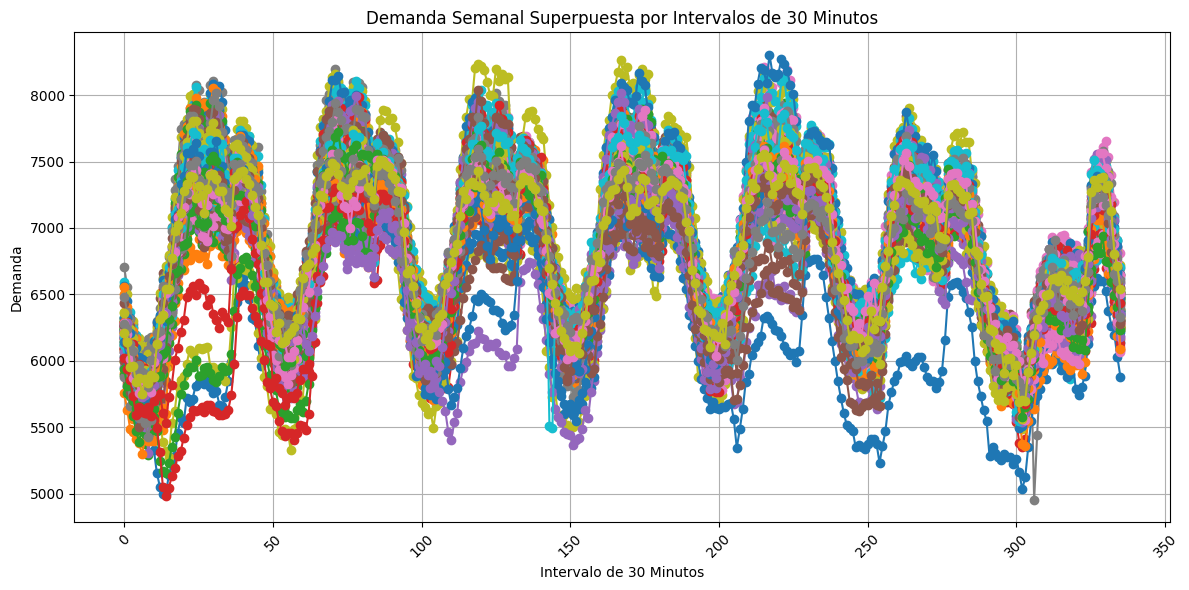

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', parse_dates=['FECHA'])

data['FECHA'] = pd.to_datetime(data['FECHA'], dayfirst=True)
data.set_index('FECHA', inplace=True)

semanas = data['DEMANDA'].resample('W')

plt.figure(figsize=(12, 6))

for semana, datos in semanas:
    
    demanda_semanal = datos.reset_index()
    
    eje_x = range(len(demanda_semanal))
    
    plt.plot(eje_x, demanda_semanal['DEMANDA'], marker='o', linestyle='-')

plt.title('Demanda Semanal Superpuesta por Intervalos de 30 Minutos')
plt.xlabel('Intervalo de 30 Minutos')
plt.ylabel('Demanda')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


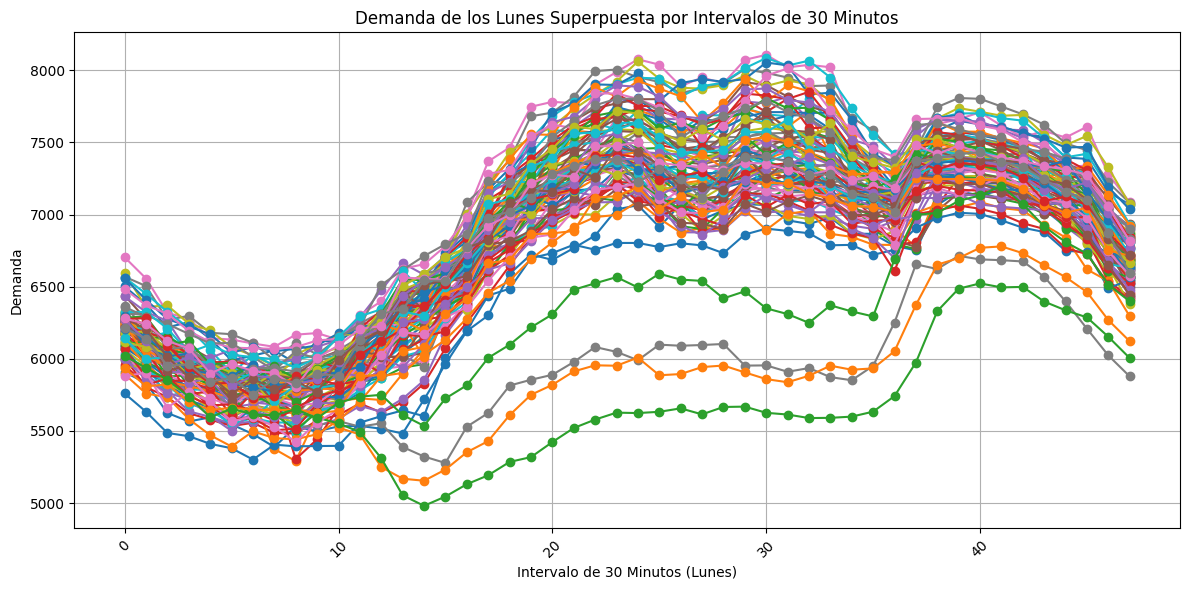

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', parse_dates=['FECHA'])

data['FECHA'] = pd.to_datetime(data['FECHA'], dayfirst=True)
data.set_index('FECHA', inplace=True)

lunes_data = data[data.index.weekday == 0]

semanas_lunes = lunes_data['DEMANDA'].resample('W')

plt.figure(figsize=(12, 6))

for semana, datos in semanas_lunes:

    demanda_lunes = datos.reset_index()
    
    eje_x = range(len(demanda_lunes))
    
    plt.plot(eje_x, demanda_lunes['DEMANDA'], marker='o', linestyle='-')

plt.title('Demanda de los Lunes Superpuesta por Intervalos de 30 Minutos')
plt.xlabel('Intervalo de 30 Minutos (Lunes)')
plt.ylabel('Demanda')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


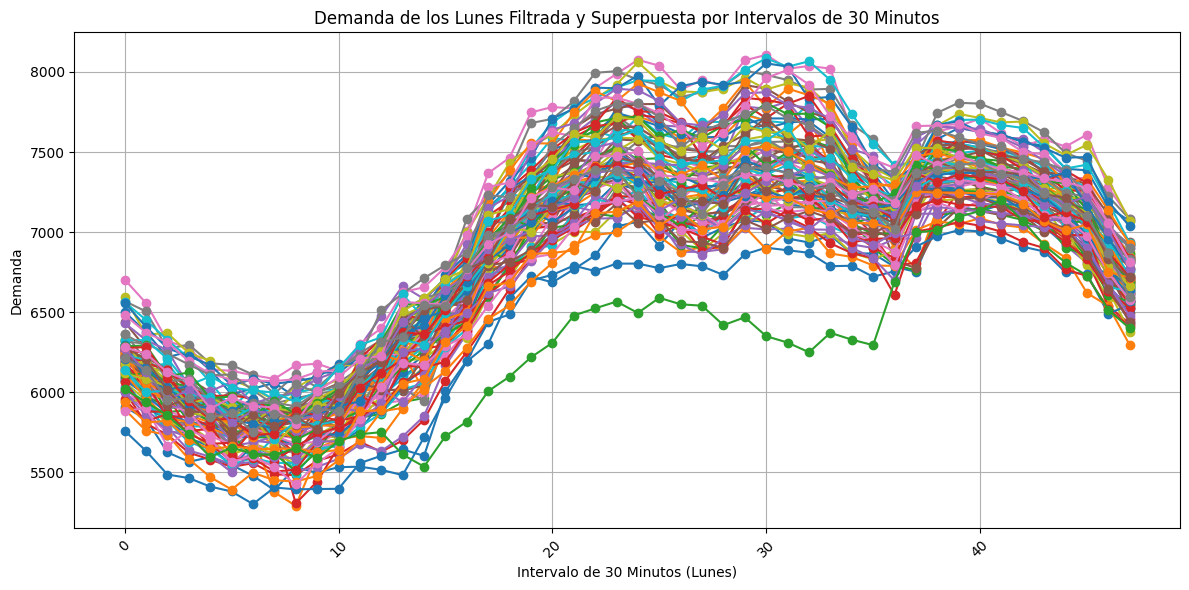

Umbral basado en percentil 10: 6702.66
Umbral basado en IQR: 6169.21
Umbral final utilizado: 6169.21


In [129]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', parse_dates=['FECHA'])

data['FECHA'] = pd.to_datetime(data['FECHA'], dayfirst=True)
data.set_index('FECHA', inplace=True)

lunes_data = data[data.index.weekday == 0]

semanas_lunes = lunes_data['DEMANDA'].resample('W').mean()

percentil_10 = semanas_lunes.quantile(0.30)

Q1 = semanas_lunes.quantile(0.20)
Q3 = semanas_lunes.quantile(0.80)
IQR = Q3 - Q1

umbral_percentil = percentil_10
umbral_iqr = Q1 - 1.5 * IQR

umbral = min(umbral_percentil, umbral_iqr)

semanas_filtradas = semanas_lunes[semanas_lunes >= umbral]

lunes_filtrados = lunes_data[lunes_data.index.to_period('W').astype(str).isin(semanas_filtradas.index.to_period('W').astype(str))]

lunes_filtrados.to_csv('data_clean.csv')

semanas_lunes_filtradas = lunes_filtrados['DEMANDA'].resample('W')

plt.figure(figsize=(12, 6))

for semana, datos in semanas_lunes_filtradas:
    demanda_lunes = datos.reset_index()
    
    eje_x = range(len(demanda_lunes))
    
    plt.plot(eje_x, demanda_lunes['DEMANDA'], marker='o', linestyle='-')

plt.title('Demanda de los Lunes Filtrada y Superpuesta por Intervalos de 30 Minutos')
plt.xlabel('Intervalo de 30 Minutos (Lunes)')
plt.ylabel('Demanda')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar umbrales para referencia
print(f'Umbral basado en percentil 10: {umbral_percentil:.2f}')
print(f'Umbral basado en IQR: {umbral_iqr:.2f}')
print(f'Umbral final utilizado: {umbral:.2f}')


Epoch 1/100


/home/owams/Desktop/porjects/projectDemanda/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2608/2608 ━━━━━━━━━━━━━━━━━━━━ 2s 419us/step - loss: 0.0974 - val_loss: 0.0737
Epoch 2/100
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - loss: 0.0308 - val_loss: 0.0291
Epoch 3/100
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - loss: 0.0256 - val_loss: 0.0377
Epoch 4/100
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - loss: 0.0278 - val_loss: 0.0264
Epoch 5/100
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - loss: 0.0244 - val_loss: 0.0248
Epoch 6/100
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - loss: 0.0244 - val_loss: 0.0407
Epoch 7/100
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - loss: 0.0244 - val_loss: 0.0324
Epoch 8/100
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - loss: 0.0246 - val_loss: 0.0242
Epoch 9/100
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - loss: 0.0228 - val_loss: 0.0228
Epoch 10/100
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - loss: 0.0214 - val_loss: 0.0252
Epoch 11/100
2608/2608 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - loss: 0.0237 - val_loss: 0.0284
Epoch 12/

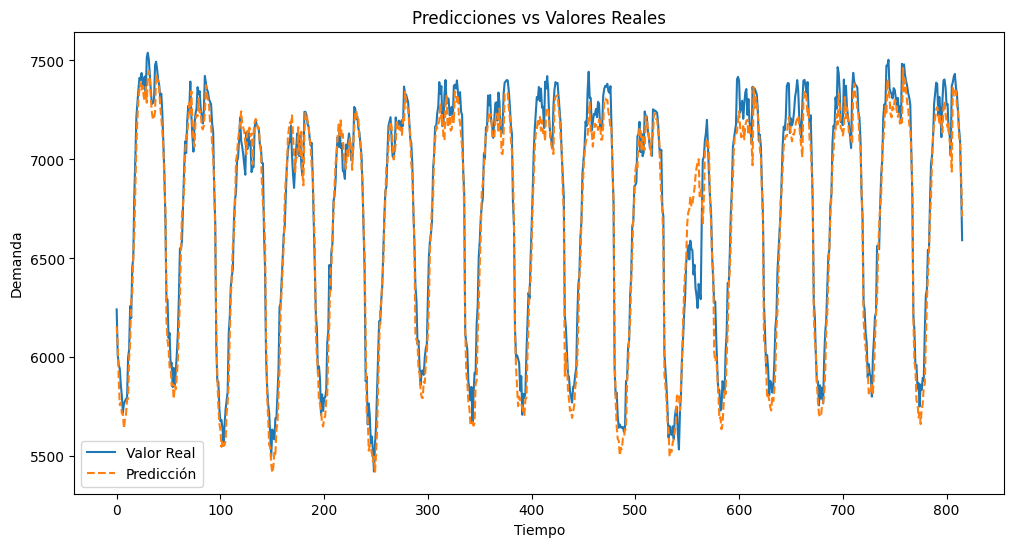

In [130]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('data_clean.csv', parse_dates=['FECHA'], index_col='FECHA')

data['hora'] = data.index.hour
data['dia'] = data.index.day
data['semana'] = data.index.isocalendar().week
data['mes'] = data.index.month

for i in range(1, 4):
    data[f'prev_{i}'] = data['DEMANDA'].shift(i)

data.dropna(inplace=True)

X = data.drop('DEMANDA', axis=1)
y = data['DEMANDA']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=1, verbose=1)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')

y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Valor Real')
plt.plot(y_pred, label='Predicción', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Tiempo')
plt.ylabel('Demanda')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


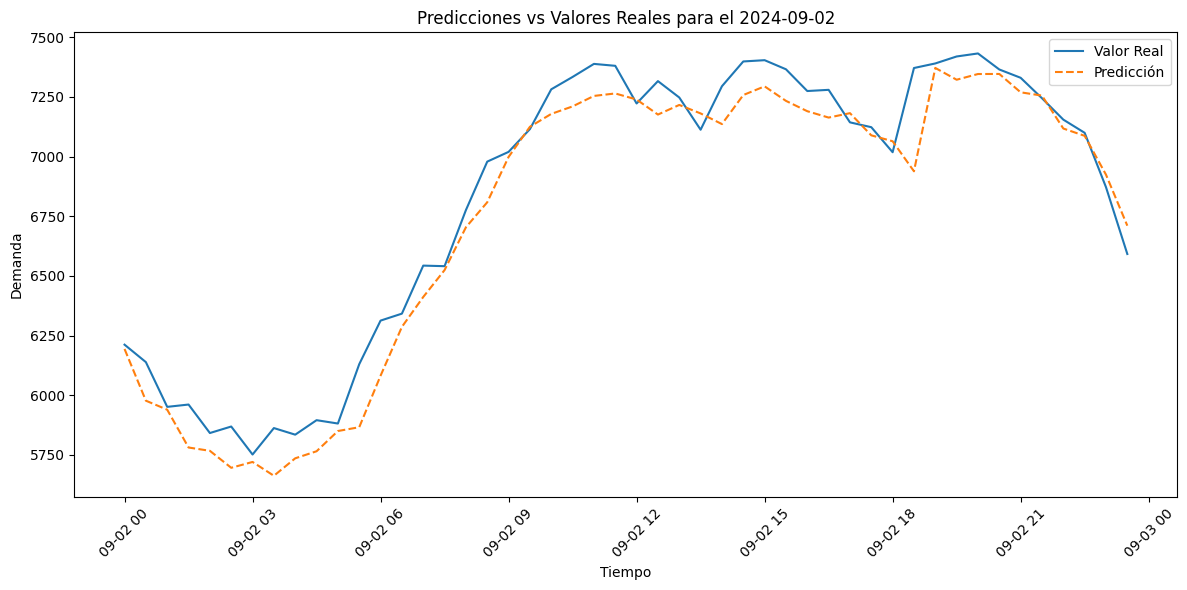

In [131]:
specific_date = '2024-09-02'
data_day = data.loc[specific_date]

X_day = data_day.drop('DEMANDA', axis=1)
y_day = data_day['DEMANDA']

X_day_scaled = scaler_X.transform(X_day)
y_day_scaled = scaler_y.transform(y_day.values.reshape(-1, 1)).flatten()

y_pred_day_scaled = model.predict(X_day_scaled)
y_pred_day = scaler_y.inverse_transform(y_pred_day_scaled)
y_day_rescaled = scaler_y.inverse_transform(y_day_scaled.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(data_day.index, y_day_rescaled, label='Valor Real')
plt.plot(data_day.index, y_pred_day, label='Predicción', linestyle='--')
plt.title(f'Predicciones vs Valores Reales para el {specific_date}')
plt.xlabel('Tiempo')
plt.ylabel('Demanda')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [132]:
data = pd.read_csv('data_lunes_09.csv', parse_dates=['FECHA'], index_col='FECHA')

data['hora'] = data.index.hour
data['dia'] = data.index.day
data['semana'] = data.index.isocalendar().week
data['mes'] = data.index.month

for i in range(1, 4):  # Usar 3 valores anteriores
    data[f'prev_{i}'] = data['DEMANDA'].shift(i)

data.dropna(inplace=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


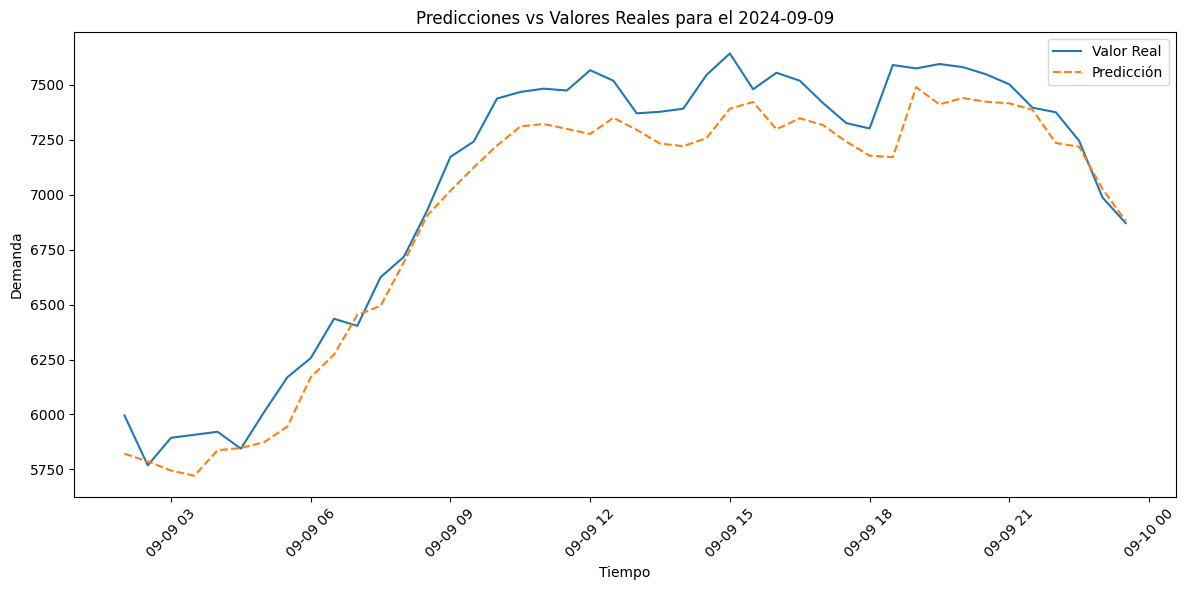

In [133]:
specific_date = '2024-09-09'
data_day = data.loc[specific_date]

X_day = data_day.drop('DEMANDA', axis=1)
y_day = data_day['DEMANDA']

X_day_scaled = scaler_X.transform(X_day)
y_day_scaled = scaler_y.transform(y_day.values.reshape(-1, 1)).flatten()

y_pred_day_scaled = model.predict(X_day_scaled)
y_pred_day = scaler_y.inverse_transform(y_pred_day_scaled)
y_day_rescaled = scaler_y.inverse_transform(y_day_scaled.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(data_day.index, y_day_rescaled, label='Valor Real')
plt.plot(data_day.index, y_pred_day, label='Predicción', linestyle='--')
plt.title(f'Predicciones vs Valores Reales para el {specific_date}')
plt.xlabel('Tiempo')
plt.ylabel('Demanda')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()